In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
user = pd.read_csv("user_table.csv")
home = pd.read_csv("home_page_table.csv")
payment = pd.read_csv("payment_page_table.csv")
search = pd.read_csv("search_page_table.csv")
pay_conf = pd.read_csv("payment_confirmation_table.csv")

In [89]:
#conversion rate from user to home page
print(user.shape)
print(home.shape)
print(user['user_id'].nunique())
print(home['user_id'].nunique())
user_home = user.merge(home, on = 'user_id', how = 'right')
con_ratuh = (home['user_id'].nunique()/user['user_id'].nunique())*100
con_ratuh
#As the values are same so the data in the user table those user id are there in home page as well so conversion rate is 100%

(90400, 4)
(90400, 2)
90400
90400


100.0

In [34]:
#conversion rate from home to search
con_ratehs = (search['user_id'].nunique()/home['user_id'].nunique())*100
con_ratehs

50.0

conversion rate is 50% for the people who went to search form home

Search to Payment

In [43]:
#trying to find the shape and the unique no of values in both the user_id columns of table
print(search.shape)
print(payment.shape)
print(search['user_id'].nunique())
print(payment['user_id'].nunique())
#merging the tables to check the  how many user id are same in both the tables
paym_search = payment.merge(search, left_on = 'user_id', right_on = 'user_id')
# even after meerging the rows are same as that in  payment page so means the data 
#is consistent the users in search are there in payment
paym_search.shape

(45200, 2)
(6030, 2)
45200
6030


(6030, 3)

In [65]:
##conversion rate from Search to payment_page_table
cosepay = (payment['user_id'].nunique()/search['user_id'].nunique())*100
cousepay = round(cosepay,2)
print(cousepay)


13.34


payment to payment_confirmation


In [45]:
#trying to find the shape and the unique no of values in both the user_id columns of table
print(payment.shape)
print(pay_conf.shape)
print(payment['user_id'].nunique())
print(pay_conf['user_id'].nunique())
#merging the tables to check the  how many user id are same in both the tables
payment_conf = payment.merge(pay_conf, left_on = 'user_id', right_on = 'user_id')
# even after meerging the rows are same as that in  payment page so means the data 
#is consistent the users in payment_conf are there in payment
print(payment_conf.shape)

(6030, 2)
(452, 2)
6030
452
(452, 3)


In [66]:
##conversion rate from payment_page_table to payment_confirmtion_table
copayc = (pay_conf['user_id'].nunique()/payment['user_id'].nunique())*100
copayc = round(copayc,2)
print(copayc)


7.5


In [90]:
#graph plot to compare the no of people visiting the pages
pages = ['home','search','payment','payment_conf']
ht = home['user_id'].nunique()
st = search['user_id'].nunique()
pt = payment['user_id'].nunique()
payc = pay_conf['user_id'].nunique()
no_users = [ht,st,pt,payc]
convrate = [con_ratuh,con_ratehs,cosepay,copayc]



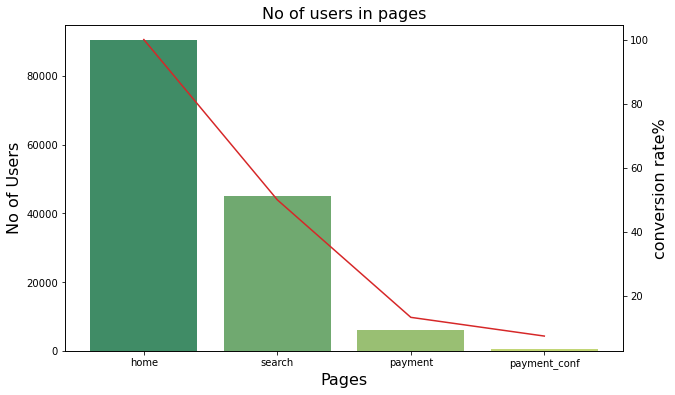

In [94]:
#create combo plot
fig,ax1 = plt.subplots(figsize = (10,6))
#bar plot creation
ax1.set_title('No of users in pages', fontsize=16)
ax1.set_xlabel('Pages', fontsize=16)
ax1.set_ylabel('No of Users', fontsize=16)
ax1 = sns.barplot(pages, no_users, palette='summer')
#for the same x axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('conversion rate%', fontsize=16)
ax2 = sns.lineplot(x= pages,y = convrate,sort = False, color=color)
plt.savefig("Comparison of users and the conversion rate")
plt.show()
